# AB Testing Case

## table of contents

### 1. Why Should You Do A/B Testing?
### 2. AB Testing Code
### 3. Check with some Method
### 4. Common Mistakes While A/B Testing?

* * *

### 0. Library

In [28]:
from IPython.display import Image
from IPython.core.display import HTML

### 1. Why should you A/B test?

A B2B business may be loaded with unqualified leads, an ecommerce store may be struggling with a high cart abandonment rate, while a media and publishing house may be dealing with low viewer engagement. These core conversion metrics are affected by some common problems like leaks in the conversion funnel, drop-offs on the payment page, etc. <br>

Let’s see why you should do A/B testing to deal with all these problems:

In [29]:
Image(url= "https://static.wingify.com/gcp/wp-content/themes/vwo/images/ab-test-with-text.svg")

### 2. AB Testing on Code

Let’s pretend we have an experiment running — are Alpacas or Bears better at converting users on our site’s landing page.

__Control is Alpaca, Experiment is Bear__

In [30]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

people_in_branch = 50

# Control is Alpaca, Experiment is Bear
control, experiment = np.random.rand(2, people_in_branch)

c_successes = sum(control < 0.16)

# Bears are about 10% better relative to Alpacas
e_successes = sum(experiment < 0.176)

c_failures = people_in_branch - c_successes
e_failures = people_in_branch - e_successes

# Our Priors
prior_successes = 8
prior_failures = 42

[Text(0,0.5,'density'), Text(0.5,0,'conversion rate')]

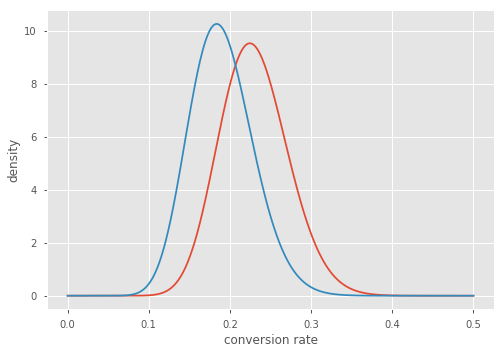

In [31]:
# For our graph
fig, ax = plt.subplots(1, 1)
plt.style.use('ggplot')
plt.grid(True)

# Control
c_alpha, c_beta = c_successes + prior_successes, c_failures + prior_failures
# Experiment
e_alpha, e_beta = e_successes + prior_successes, e_failures + prior_failures

x = np.linspace(0., 0.5, 1000) 

# Generate and plot the distributions!
c_distribution = beta(c_alpha, c_beta)
e_distribution = beta(e_alpha, e_beta)

ax.plot(x, c_distribution.pdf(x))
ax.plot(x, e_distribution.pdf(x))

ax.set(xlabel='conversion rate', ylabel='density')

In [32]:
more_people_in_branch = 4000

# Control is Alpaca, Experiment is Bear
control, experiment = np.random.rand(2, more_people_in_branch)

# Add to existing data
c_successes += sum(control < 0.16)
e_successes += sum(experiment < 0.176)

c_failures += more_people_in_branch - sum(control < 0.16)
e_failures += more_people_in_branch - sum(experiment < 0.176)

#### Our graph after adding some people

[Text(0,0.5,'density'), Text(0.5,0,'conversion rate')]

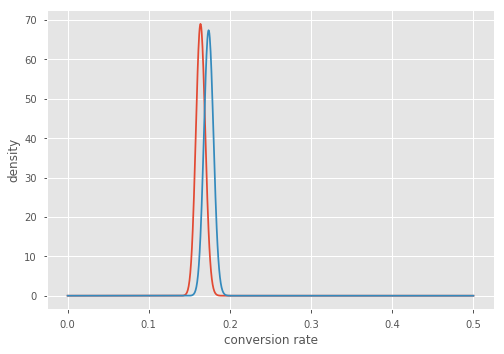

In [33]:
fig, ax = plt.subplots(1, 1)
plt.style.use('ggplot')
plt.grid(True)

# Control
c_alpha, c_beta = c_successes + prior_successes, c_failures + prior_failures
# Experiment
e_alpha, e_beta = e_successes + prior_successes, e_failures + prior_failures

x = np.linspace(0., 0.5, 1000) 

# Generate and plot the distributions!
c_distribution = beta(c_alpha, c_beta)
e_distribution = beta(e_alpha, e_beta)

ax.plot(x, c_distribution.pdf(x))
ax.plot(x, e_distribution.pdf(x))

ax.set(xlabel='conversion rate', ylabel='density')

## 3. Check with Some Method

### 3.1 Bayesian Error Bars

A simple approach to comparing the two distributions is to generate error bars for each branch’s distribution. To do that we use the extremely useful CDF or Cumulative Distribution Function which turns a value in the distribution into its percentile rank.

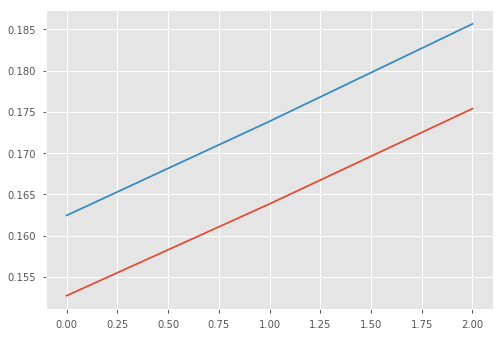

In [54]:
fig = plt.figure()
ax = plt.axes()
# Arguments are x values so use ppf - the inverse of cdf
#('Control -> Alapaca:')
#('Experiment -> Bears:')
ax.plot(c_distribution.ppf([0.025, 0.5, 0.975])) #Red as Alapaca
ax.plot(e_distribution.ppf([0.025, 0.5, 0.975])) #Blue as Bear

So it looks like the Bears (blue line) win! But there’s still some overlap, so let’s double check to be really sure.

### 3.2 Bayesian p-value

We want to answer the question “what is the probability that Alpacas are actually better than Bears.” We can try and achieve this by taking samples from both distributions and comparing which sample has the larger conversion rate. If we do this enough times we should get a pretty accurate read on the question above.

In [58]:
sample_size = 100000

c_samples = pd.Series([c_distribution.rvs() for _ in range(sample_size)])
e_samples = pd.Series([e_distribution.rvs() for _ in range(sample_size)])

p_ish_value = 1.0 - sum(e_samples > c_samples)/sample_size

print('p-value: ',p_ish_value)

p-value:  0.11451999999999996


Our “p-value” is more than 0.05, so we can declare Bears the winner!

### 3.3 Small Victories

Doing testing to find really small wins is very expensive for most businesses. It makes sense to check just how much of an improvement we think the Experiment is vs. the Control. <br>

To do this we can generate a CDF of the B samples over the A samples:

[Text(0,0.5,'CDF'), Text(0.5,0,'Bears / Alpacas')]

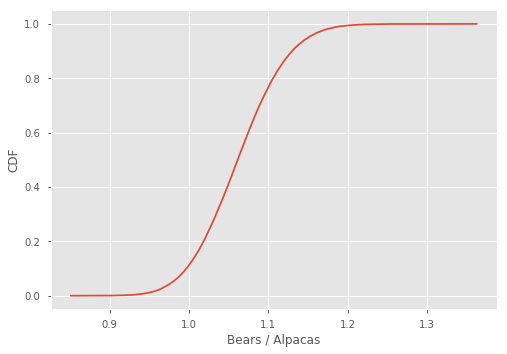

In [36]:
fig, ax = plt.subplots(1, 1)

ser = pd.Series(e_samples/c_samples)

# Make the CDF
ser = ser.sort_values()
ser[len(ser)] = ser.iloc[-1] 
cum_dist = np.linspace(0., 1., len(ser))
ser_cdf = pd.Series(cum_dist, index=ser)

ax.plot(ser_cdf)
ax.set(xlabel='Bears / Alpacas', ylabel='CDF')

As expected there aren’t many values below 0 meaning the A branch didn’t win very often. Eyeballing the median we can see it’s pretty close to 1.1, agreeing with our initial “10% better” setting.

### 3.4 Conlusion

After doing a/b test with some method (Bayesian Error Bars, Bayesian p-value, small victories), every method have a conclution that Bear (our experiment variable) is better than Alpacas (our control variable).

### 4. Common Mistakes While A/B Testing

Invalid hypothesis: In A/B testing, hypothesis is formulated before conducting a test. All the next steps depend on it: what should be changed, why should it be changed, what the expected outcome is, and so on. If you start with the wrong hypothesis, the probability of the test succeeding decreases. <br>

In [37]:
Image(url= "https://static.wingify.com/gcp/wp-content/themes/vwo/images/ab-test-mistakes-part-1.svg")

* * *

## ref:

https://towardsdatascience.com/bayesian-a-b-testing-with-python-the-easy-guide-d638f89e0b8a <br>
https://vwo.com/ab-testing/#why-ab-testing <br>

**.avo**